In [1]:
# read and manipulate the date
# real world raw data (csv file)
# cleaning of raw data and data analysis
# feature engineering
# prediction

In [2]:
import pandas as pd   # pandas is used for data manipulation, extraction etc...
import numpy as np    # for mathematical calculations, mean, median, variance, standard deviation etc... 
import matplotlib.pyplot as plt  # data visualization library for plotting graphs etc...
import seaborn as sns  # advanced data visualization library for exploring and understanding the data...

In [3]:
df=pd.read_csv('../input/zomato-bangalore-restaurants/zomato.csv')  # to load and read the data of csv file...

In [4]:
df.head()  # it returns how the data looks like-- first 5 rows of the data frame...

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [5]:
df.shape  # for total no. of rows and columns...

(51717, 17)

In [6]:
print(list(df.columns))  # list of all the columns of dataset...

['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)', 'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)']


In [7]:
df.isnull().sum()  # sum of all the missing values in each and every feature(column)...

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [8]:
## for all the features that have NAN values...

In [9]:
feature_na=[]  # defining the list
for feature in df.columns: 
    if df[feature].isnull().sum()>1: 
        feature_na.append(feature)  # consider the feature and append each and every feature...
feature_na

['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

In [10]:
# for each and every feature, what is the percentage of missing values...
# inside for loop, created a placeholder, which recieves values from format function

In [11]:
for feature in feature_na:
    print('{} has {} % missing values '.format(feature,np.round(df[feature].isnull().sum()/len(df)*100,4)))

rate has 15.0337 % missing values 
phone has 2.3358 % missing values 
location has 0.0406 % missing values 
rest_type has 0.4389 % missing values 
dish_liked has 54.2916 % missing values 
cuisines has 0.087 % missing values 
approx_cost(for two people) has 0.669 % missing values 


In [12]:
## Getting datatypes of features and its overview...

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [14]:
## Performing data cleaning on approx_cost feature......
## cost must be in int or float, so will change its datatype from object to float...

In [15]:
df['approx_cost(for two people)'].isnull()  # to check where it exactly contains null value...

0        False
1        False
2        False
3        False
4        False
         ...  
51712    False
51713    False
51714    False
51715    False
51716    False
Name: approx_cost(for two people), Length: 51717, dtype: bool

In [16]:
df[df['approx_cost(for two people)'].isnull()]  # give all the null values in approx_cost.....

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
1662,https://www.zomato.com/bangalore/papa-khan-ras...,"6, Abbiah Layout KC Halli Main Road, Bommanaha...",Papa Khan Rasoi,No,No,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,[],[],Delivery,Bannerghatta Road
1768,https://www.zomato.com/bangalore/innate-jp-nag...,"45, 14th Main, 7th phase, Puttehahalli Palya, ...",Innate,No,No,NaN,0,NaN,JP Nagar,Delivery,NaN,Beverages,NaN,[],[],Delivery,Bannerghatta Road
1795,https://www.zomato.com/bangalore/super-chefs-b...,"8/3, Opposite Suryadhoya Convention hall, Bann...",Super Chef's (New Royal treat),No,No,NaN,0,NaN,Bannerghatta Road,Quick Bites,NaN,"North Indian, Chinese, South Indian",NaN,"[('Rated 1.0', 'RATED\n Many items were missi...",[],Delivery,Bannerghatta Road
3069,https://www.zomato.com/bangalore/super-chefs-b...,"8/3, Opposite Suryadhoya Convention hall, Bann...",Super Chef's (New Royal treat),No,No,-,0,NaN,Bannerghatta Road,Quick Bites,NaN,"North Indian, Chinese, South Indian",NaN,"[('Rated 1.0', 'RATED\n Many items were missi...",[],Delivery,Basavanagudi
3774,https://www.zomato.com/bangalore/the-hub-ibis-...,"Ibis Bengaluru, Opposite RMZ Ecospace Business...",The Hub - Ibis Bengaluru,No,No,3.9/5,237,NaN,Marathahalli,Bar,"Dal Makhani, Cocktails, Lunch Buffet, Breakfas...",Finger Food,NaN,"[('Rated 4.0', 'RATED\n The Hub is a small ba...",[],Buffet,Bellandur
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50940,https://www.zomato.com/bangalore/cinnabon-whit...,"Ground Floor, The Forum Neighborhood Mall, Pre...",Cinnabon,No,No,4.0 /5,80,NaN,Whitefield,Quick Bites,"Rolls, Cinnamon Roll, Cinnamon Bun","Beverages, American, Bakery",NaN,"[('Rated 4.0', ""RATED\n Who else is a Cinnabo...",[],Desserts,Whitefield
51233,https://www.zomato.com/bangalore/mayas-kitchen...,"43/9, Borewell Rd, Palm Meadows, Nallurhalli, ...",Mayas kitchen,No,No,NaN,0,NaN,Whitefield,Casual Dining,NaN,"South Indian, Chinese, Chettinad",NaN,"[('Rated 4.0', ""RATED\n Food was pretty good,...",[],Dine-out,Whitefield
51247,https://www.zomato.com/bangalore/mast-kalandar...,"D64, 33, 1st Floor, Sundari Armadale, Next To ...",Mast Kalandar,No,No,2.6 /5,76,NaN,Whitefield,Casual Dining,"Gulab Jamun, Lassi, Dal Makhani, Buttermilk, T...",North Indian,NaN,"[('Rated 1.0', 'RATED\n Terrible food in this...",[],Dine-out,Whitefield
51271,https://www.zomato.com/bangalore/karavalli-foo...,"N254-107, 1st Main Road, Near ITPL Gate 3, KIA...",Karavalli Food Court,No,No,3.2 /5,4,NaN,Whitefield,Casual Dining,NaN,South Indian,NaN,"[('Rated 1.0', 'RATED\n i was a regular custo...",[],Dine-out,Whitefield


In [17]:
# to check if there is any special character...
# comma(,)-- becoz of (,), it is an object datatype...

In [18]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [19]:
# using lambda function, replacing (,) with ('')

In [20]:
df['approx_cost(for two people)'].astype(str).apply(lambda x:x.replace(',',''))

0         800
1         800
2         800
3         300
4         600
         ... 
51712    1500
51713     600
51714    2000
51715    2500
51716    1500
Name: approx_cost(for two people), Length: 51717, dtype: object

In [21]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].astype(str).apply(lambda x:x.replace(',',''))

In [22]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].astype(float)

In [23]:
df['approx_cost(for two people)'].dtype  # converted into float...

dtype('float64')

In [24]:
# Clean the rate column...
# rating is out of 5 star, so we need to remove the '/5' and clean the feature...
# due to NAN and special characters, it is an object data type...(convert in float)

In [25]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [26]:
df['rate'].isnull().sum()

7775

In [27]:
# split function to split the value in two parts from '/' and only have the first part...

In [28]:
def split(x):
    return x.split('/')[0]

In [29]:
df['rate']=df['rate'].astype(str).apply(split)

In [30]:
df['rate'].unique()  # got all the values after splitting...

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       'nan', '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4',
       '2.2', '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ',
       '4.1 ', '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ',
       '2.5 ', '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1',
       '2.0', '1.8', '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ',
       '2.4 ', '2.1 ', '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [31]:
# remove NEW and - also...

In [32]:
df['rate'].replace('-',0,inplace=True)
df['rate'].replace('NEW',0,inplace=True)

In [33]:
df['rate']=df['rate'].astype(float)  # converting into float...

In [34]:
df['rate'].dtype  # rate feature converted into float data type...

dtype('float64')

In [35]:
## Analyze the categories of restaurants...

In [36]:
df['rest_type'].value_counts()  # accessing the types and quantity of restaurants...

Quick Bites                   19132
Casual Dining                 10330
Cafe                           3732
Delivery                       2604
Dessert Parlor                 2263
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Sweet Shop, Dessert Parlor        1
Quick Bites, Kiosk                1
Name: rest_type, Length: 93, dtype: int64

In [37]:
# to plot these rest_type features...

<AxesSubplot:>

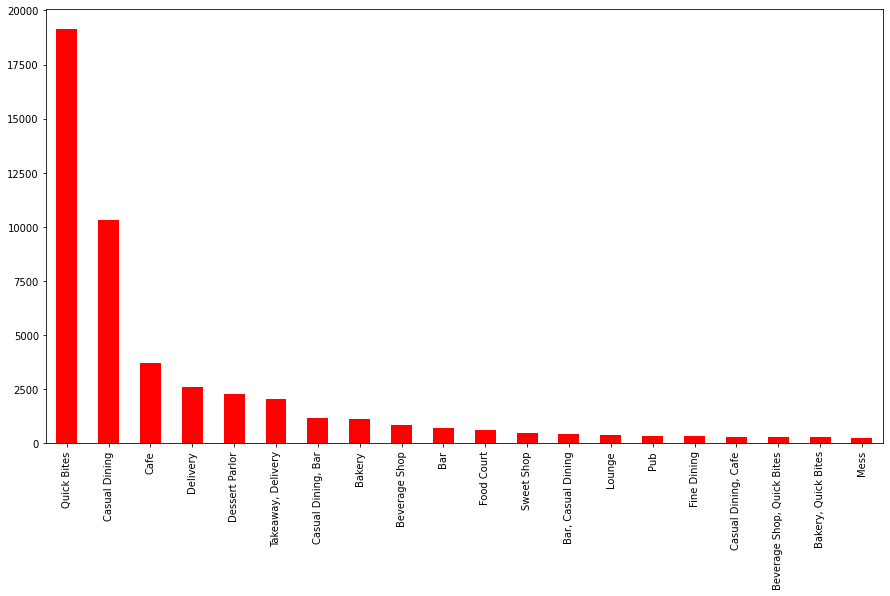

In [38]:
plt.figure(figsize=(15,8))  # to set width and height...
df['rest_type'].value_counts().nlargest(20).plot.bar(color='red')  # for top 20 entries...

In [39]:
# for summarizing these insights, created a function....
# Quick Bites and Casual Dining are dominating over other restaurants...

In [40]:
def mark(x):
    if x in ('Quick Bites','Casual Dining'):
        return 'Quick Bites + Casual Dining'
    else:
        return 'others'    

In [41]:
df['Top_types']=df['rest_type'].apply(mark)  # applied mark func. at top of rest_type feature and stored the values in Top_types...

In [42]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Top_types
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,Quick Bites + Casual Dining
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,Quick Bites + Casual Dining
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,others
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Quick Bites + Casual Dining
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,Quick Bites + Casual Dining


In [43]:
import plotly.express as px  # advance data visualization library used for generating deployment level visuals...

In [44]:
values=df['Top_types'].value_counts().values  # values of pie chart...

In [45]:
labels=df['Top_types'].value_counts().index  # labels of pie chart...

In [46]:
# for pie chart, need data frame, names(labels) and values...

In [47]:
fig=px.pie(df,names=labels,values=values, title='Pie Chart')
fig.show()  # to show the pie chart

In [48]:
# from the above pie chart it is clear that 57% of the resturants belong to Q.B and C.D and rest 43% belong to other categories...

In [49]:
## Create a new data frame in which we have votes, cost and rating of each restaurant...
# Grouped the data by name and then aggregate, for each rest. count the no. of votes and also count no. of restaurants using url...
#converted into data frame by using reset_index()

In [50]:
rest=df.groupby('name').agg({'votes':'sum','url':'count','approx_cost(for two people)':'mean','rate':'mean'}).reset_index()
rest

,name,votes,url,approx_cost(for two people),rate
0,#FeelTheROLL,14,2,200.0,3.400000
1,#L-81 Cafe,432,9,400.0,3.900000
2,#Vibes Restro,0,3,700.0,NaN
3,#refuel,111,3,400.0,3.700000
4,'Brahmins' Thatte Idli,0,1,100.0,NaN
...,...,...,...,...,...
8787,late100,0,5,200.0,NaN
8788,nu.tree,1443,8,400.0,4.314286
8789,re:cess - Hilton Bangalore Embassy GolfLinks,438,3,1200.0,4.100000
8790,repEAT Hub,0,2,200.0,NaN


In [51]:
# manipulated the data frame according to our convinience...changing the names of columns...

In [52]:
rest.columns=['Name','Total_votes','Total_unities','Avg_approx_cost','Mean_rating']
rest.head()

,Name,Total_votes,Total_unities,Avg_approx_cost,Mean_rating
0,#FeelTheROLL,14,2,200.0,3.4
1,#L-81 Cafe,432,9,400.0,3.9
2,#Vibes Restro,0,3,700.0,NaN
3,#refuel,111,3,400.0,3.7
4,'Brahmins' Thatte Idli,0,1,100.0,NaN


In [53]:
rest['Votes_per_unity']=rest['Total_votes']/rest['Total_unities']  # added a new column
rest.head()

,Name,Total_votes,Total_unities,Avg_approx_cost,Mean_rating,Votes_per_unity
0,#FeelTheROLL,14,2,200.0,3.4,7.0
1,#L-81 Cafe,432,9,400.0,3.9,48.0
2,#Vibes Restro,0,3,700.0,NaN,0.0
3,#refuel,111,3,400.0,3.7,37.0
4,'Brahmins' Thatte Idli,0,1,100.0,NaN,0.0


In [54]:
popular=rest.sort_values(by='Total_unities',ascending=False)  #sorting the data frame according to the Total_unities...
popular

,Name,Total_votes,Total_unities,Avg_approx_cost,Mean_rating,Votes_per_unity
1320,Cafe Coffee Day,3089,96,844.791667,3.147191,32.177083
5549,Onesta,347520,85,600.000000,4.410588,4088.470588
3788,Just Bake,2898,73,400.000000,3.355882,39.698630
2446,Empire Restaurant,229808,71,685.211268,3.916901,3236.732394
2577,Five Star Chicken,3134,70,257.857143,3.425000,44.771429
...,...,...,...,...,...,...
1900,Cool Break,11,1,150.000000,3.400000,11.000000
8076,The Shake Factory Originals,8,1,200.000000,3.300000,8.000000
5216,Nethravathi Military Hotel,0,1,200.000000,NaN,0.000000
7426,Swadisht North Indian Restaurant,23,1,200.000000,3.200000,23.000000


In [55]:
## restuarant overview analysis...
# avg votes recieved by restaurant.
# Top 5 most voted restaurants.
# Top 5 least voted restaurants.

In [56]:
# Top 5 most voted restaurants.
popular.sort_values(by='Total_votes', ascending=False).query('Total_votes > 0').head(5)

,Name,Total_votes,Total_unities,Avg_approx_cost,Mean_rating,Votes_per_unity
5549,Onesta,347520,85,600.000000,4.410588,4088.470588
8269,Truffles,301059,43,900.000000,4.595349,7001.372093
2446,Empire Restaurant,229808,71,685.211268,3.916901,3236.732394
3054,Hammered,180602,47,1272.340426,4.329787,3842.595745
7751,The Black Pearl,172122,18,1427.777778,4.727778,9562.333333


In [57]:
# Top 5 least voted restaurants (using tail)...
popular.sort_values(by='Total_votes', ascending=False).query('Total_votes > 0').tail(5)

,Name,Total_votes,Total_unities,Avg_approx_cost,Mean_rating,Votes_per_unity
6840,Silver Spoon,4,1,800.0,3.30,4.0
3420,House of Mandarin,4,1,300.0,3.30,4.0
858,Begum's Biriyani,4,1,500.0,3.20,4.0
4580,Mahadwani Restaurant,4,1,300.0,3.30,4.0
8632,Wood Fire Pizza,4,4,350.0,1.55,1.0


Text(0.5, 1.0, 'Top 5 Least Voted Restaurants\n(with at least 1 vote)')

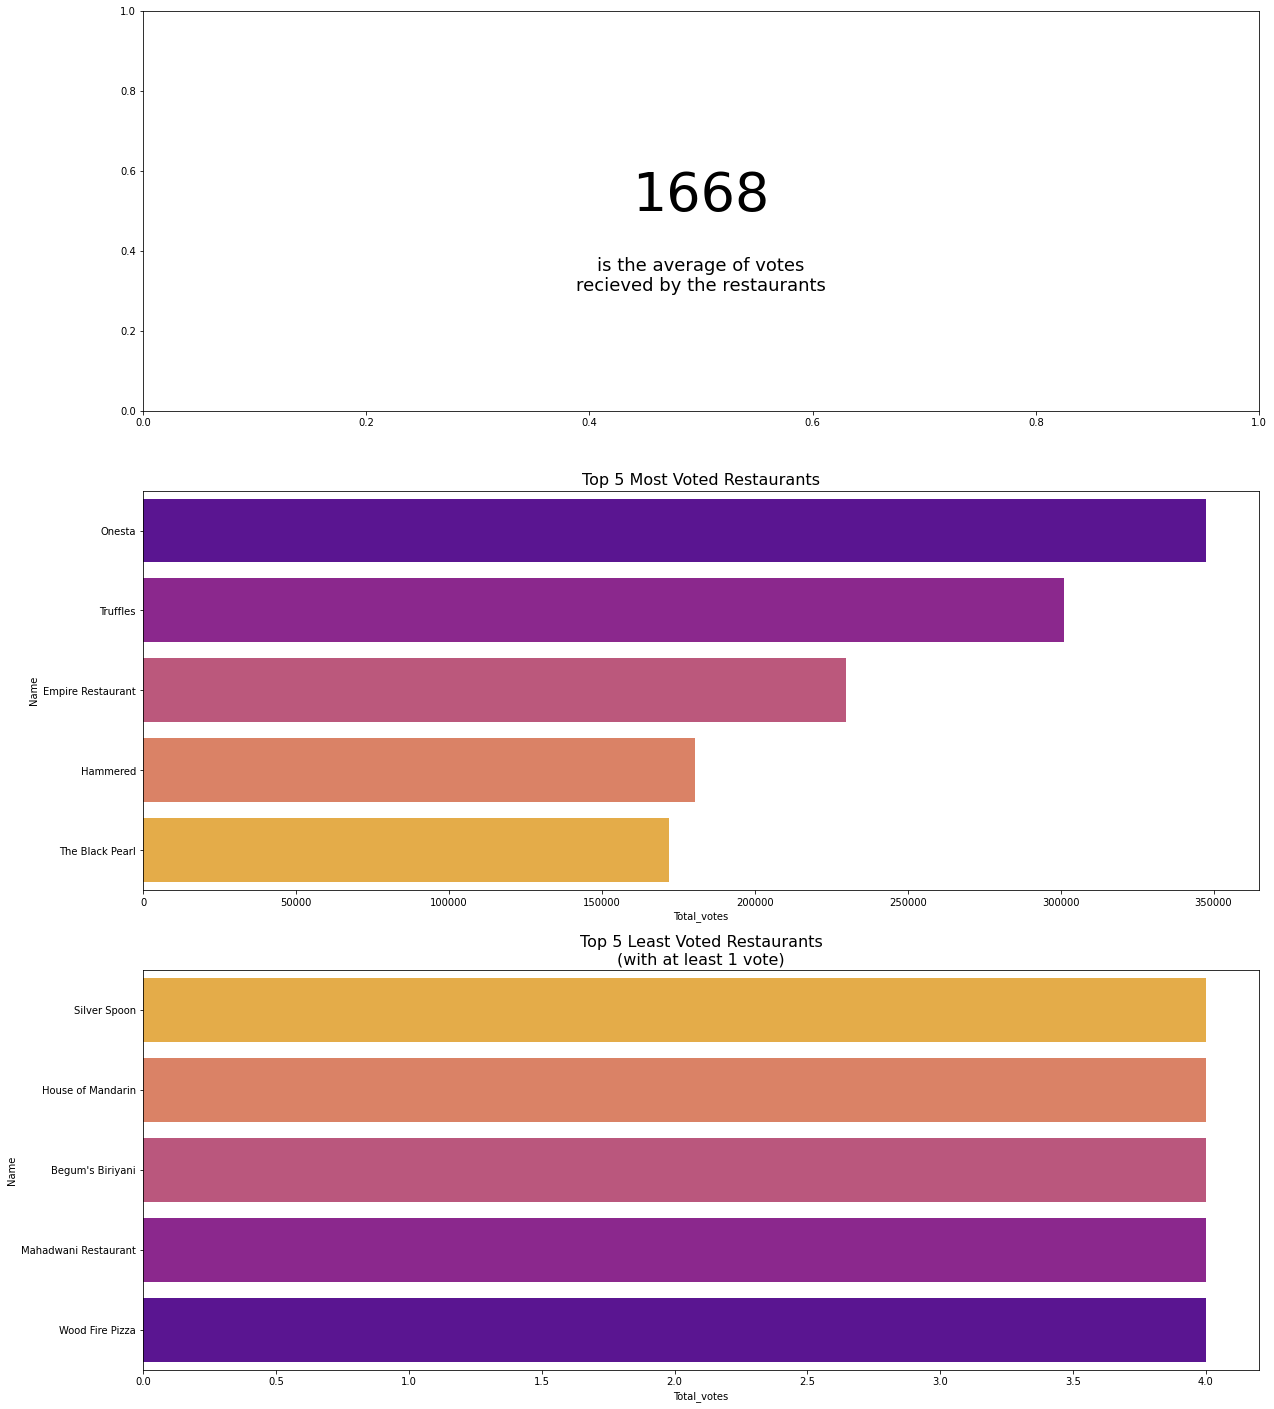

In [58]:
#creating a subplot...(Plotting all the 3 statistics)
fig, (ax1,ax2,ax3)= plt.subplots(3,1,figsize=(20,25))  # 3 axis for these 3 analysis...
# ax1-- for avg votes recieved by restaurant
ax1.text(0.50, 0.50, int(popular['Total_votes'].mean()), fontsize=54, ha='center') # ha for text to be center...
ax1.text(0.50, 0.35, 'is the average of votes', fontsize=18, ha='center')
ax1.text(0.50, 0.30, 'recieved by the restaurants', fontsize=18, ha='center')

# ax2-- for top 5 most voted restaurants
sns.barplot(x='Total_votes', y='Name', data=popular.sort_values(by='Total_votes', ascending=False).query('Total_votes > 0').head(5),ax=ax2, palette='plasma')
ax2.set_title('Top 5 Most Voted Restaurants', size=16)

# ax3-- for top 5 least voted restaurants
sns.barplot(x='Total_votes', y='Name', data=popular.sort_values(by='Total_votes', ascending=False).query('Total_votes > 0').tail(5),ax=ax3, palette='plasma_r')
ax3.set_title('Top 5 Least Voted Restaurants\n(with at least 1 vote)', size=16)

In [59]:
## PERFORMING IN DEPTH ANALYSIS OF RESTAURANT...
# Most expensive and cheapest restaurants
# How many restaurants offer book table services and online order services

Text(0.5, 1.0, 'Top 5 Cheapest Restaurants')

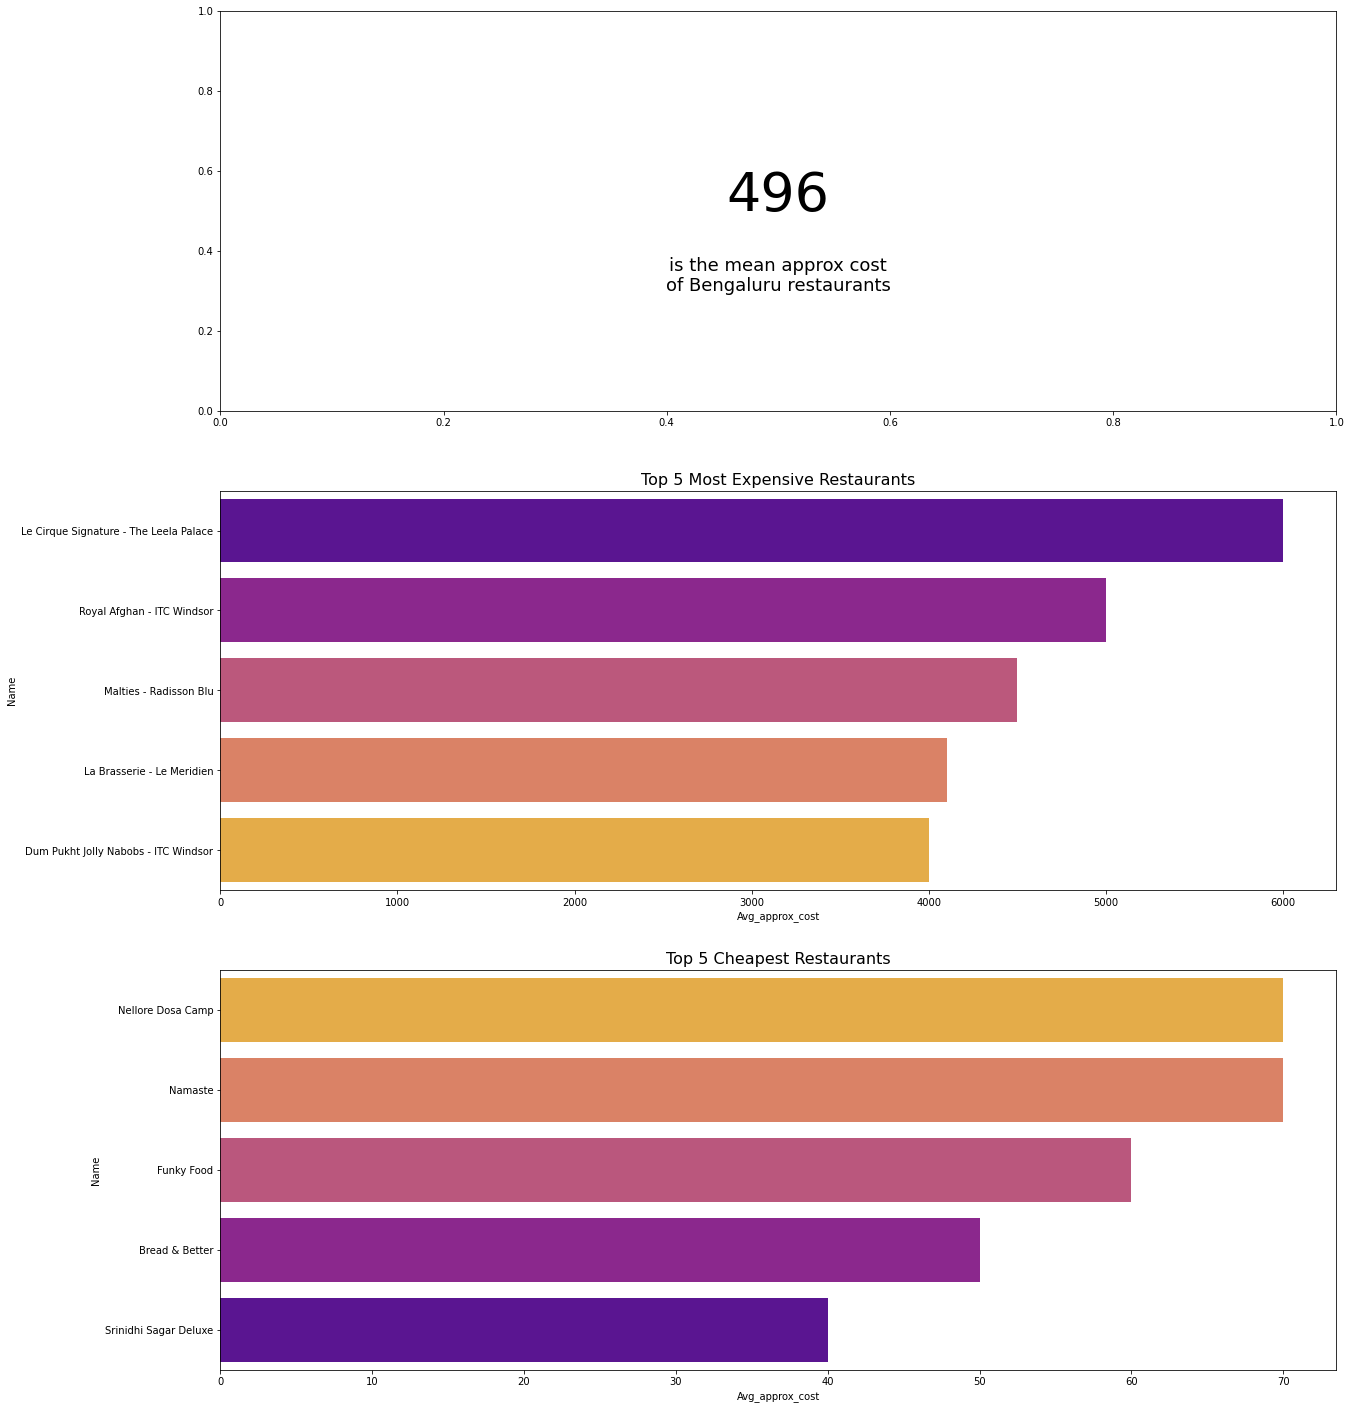

In [60]:
# Most expensive and cheapest restaurants
fig, (ax1,ax2,ax3)= plt.subplots(3,1,figsize=(20,25))  # 3 axis for these 3 analysis...
ax1.text(0.50, 0.50, int(popular['Avg_approx_cost'].mean()), fontsize=54, ha='center') # ha for text to be center...
ax1.text(0.50, 0.35, 'is the mean approx cost', fontsize=18, ha='center')
ax1.text(0.50, 0.30, 'of Bengaluru restaurants', fontsize=18, ha='center')

sns.barplot(x='Avg_approx_cost', y='Name', data=popular.sort_values(by='Avg_approx_cost', ascending=False).query('Avg_approx_cost > 0').head(5),ax=ax2, palette='plasma')
ax2.set_title('Top 5 Most Expensive Restaurants', size=16)

sns.barplot(x='Avg_approx_cost', y='Name', data=popular.sort_values(by='Avg_approx_cost', ascending=False).query('Avg_approx_cost > 0').tail(5),ax=ax3, palette='plasma_r')
ax3.set_title('Top 5 Cheapest Restaurants', size=16)

In [61]:
# How many restaurants offer book table services and online order services

In [62]:
x=df['book_table'].value_counts()  # checking the number of restaurants providing this service... 
labels=['No Book Table', 'Book Table']

In [63]:
import plotly.graph_objs as go
from plotly.offline import iplot  #ipython plot-- to display the plot, passed it to iplot...

trace=go.Pie(labels=labels,values=x,hoverinfo='label+percent',textinfo='percent',textfont=dict(size=25),
              pull=[0, 0, 0,0.2, 0])
iplot([trace])

In [64]:
# from the above pie chart, it is clear that most of the restaurants do not provide book table services... 

In [65]:
x=df['online_order'].value_counts()
labels=['Accepted','Not accepted']

fig = px.pie(df, values=x, names=labels,title='Pie chart')
fig.show()

In [66]:
# from the above pie chart, it is clear that most of the restaurants accept online order services... 

In [67]:
## ANALYSING BEST BUDGET RESTAURANTS...
#1 Best budget restaurants in any location

In [68]:
#1 Best budget restaurants in any location
# created a function that accepts the location and type of rest. and gives the best budget restaurant accordingly..
# with the condition of rating greater than 4.0

In [69]:
def return_budget(location,restaurant_type):
    filter=(df['approx_cost(for two people)']<=400) & (df['location']==location) & (df['rate']>=4) & (df['rest_type']==restaurant_type)
    budget=df[filter]
    return (budget['name'].unique())

In [70]:
return_budget('BTM','Quick Bites')  # provide any location and restaurant type according to our convinience

array(['Hiyar Majhe Kolkata', 'Swadista Aahar', 'Swad Punjab Da',
       'Roti Wala', 'Litti Twist', 'The Shawarma Shop', 'Gorbandh',
       'Yum In My Tum', 'Nanna Munna Paratha House', 'Chaatimes',
       'Andhra Kitchen', "Muthashy's", 'Ashirvaad Grand', 'Petoo',
       'Ilyazsab The House Of Chicken', 'Kannur Food Point',
       "Domino's Pizza", 'KFC', 'Hari Super Sandwich',
       'The Biriyani Pedia', 'World Of Asia'], dtype=object)

In [71]:
#2 Extract latitude and longitude for any place (for geographical analysis)
#-- means, to find highest rated restaurant at a particular location (we need latitude and longitude)

In [72]:
## GEOGRAPHICAL ANALYSIS...
#1 Extract latitude nad longitudes of each and every restaurant
#-- for finding highest rated restaurant at a particular location (we need latitude and longitude)
#2 Spatial analysis (geo. analysis) --generating the map
#-- where exactly most of the restaurants are situated

In [73]:
# there are total 93 unique locations
locations=pd.DataFrame({'Name':df['location'].unique()})  # converting it into data frame specifically for location
locations

,Name
0,Banashankari
1,Basavanagudi
2,Mysore Road
3,Jayanagar
4,Kumaraswamy Layout
...,...
89,West Bangalore
90,Magadi Road
91,Yelahanka
92,Sahakara Nagar


In [74]:
#2 where exactly most of the restaurants are situated
# for each location, there is count of the no. of restaurants

In [75]:
Rest_locations=pd.DataFrame(df['location'].value_counts().reset_index())  #Rest_type data frame 
Rest_locations.columns=['Name','count']  # changing the column/feature name
Rest_locations.head()

,Name,count
0,BTM,5124
1,HSR,2523
2,Koramangala 5th Block,2504
3,JP Nagar,2235
4,Whitefield,2144


In [76]:
# merging both the data frames on the basis of common (feature i.e; name) to get the total no. of restaurants at each location
Restaurant_locations=Rest_locations.merge(locations,on='Name',how="left").dropna()  # used for spatial analysis
Restaurant_locations.head()

,Name,count
0,BTM,5124
1,HSR,2523
2,Koramangala 5th Block,2504
3,JP Nagar,2235
4,Whitefield,2144


In [77]:
#-- Spatial analysis

In [78]:
## ANALYSING CUSTOMER BEHAVIOUR USING WORDCLOUD
#1 Analyze customer preference (likes/dislikes)

In [79]:
# wordcloud-- data visualization technique used for representing text data in which the size of each word indicates its importance
#-- bigger the size of dish, more it is liked 
from wordcloud import WordCloud, STOPWORDS  # STOPWORDS-- used to deal with unneccesary words like is, am are etc.

In [80]:
data=df[df['rest_type']=='Quick Bites']  # data w.r.t Quick Bites restaurants
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Top_types
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Quick Bites + Casual Dining
31,https://www.zomato.com/bangalore/foodiction-1-...,"2/1, 7th Main, Dwarakangar, Hosakeregalli, Ban...",Foodiction,Yes,No,2.8,506,+91 9916107070,Banashankari,Quick Bites,"Burgers, Lassi, Chicken Grill, Naan, Momos, Ch...","North Indian, Fast Food, Chinese, Burger",500.0,"[('Rated 1.0', ""RATED\n Worst restaurant ever...",[],Delivery,Banashankari,Quick Bites + Casual Dining
34,https://www.zomato.com/bangalore/faasos-banash...,"80, BDA Complex, 2nd Stage, Banashankari, Bang...",Faasos,Yes,No,4.2,415,+91 7700020020,Banashankari,Quick Bites,"Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...","North Indian, Biryani, Fast Food",500.0,"[('Rated 3.0', 'RATED\n Not worth for the mon...","['Chole Kulcha Meal', 'Upvas Aloo Paratha With...",Delivery,Banashankari,Quick Bites + Casual Dining
36,https://www.zomato.com/bangalore/fast-and-fres...,"32, 7th Main Road, Dwaraka Nagar,Near PES Coll...",Fast And Fresh,Yes,No,2.8,91,+91 9742974232,Banashankari,Quick Bites,NaN,"North Indian, Chinese, Fast Food",400.0,"[('Rated 1.0', 'RATED\n Half baked rice in a ...",[],Delivery,Banashankari,Quick Bites + Casual Dining
39,https://www.zomato.com/bangalore/maruthi-davan...,"556/A, Water Tank Road, 3rd Stage, Banashankar...",Maruthi Davangere Benne Dosa,Yes,No,4.0,17,+91 9019563485,Banashankari,Quick Bites,NaN,South Indian,150.0,"[('Rated 5.0', ""RATED\n This restaurant serve...","['Benne Dosa', 'Benne Masala Dosa', 'Benne Kal...",Delivery,Banashankari,Quick Bites + Casual Dining


(-0.5, 1499.5, 1499.5, -0.5)

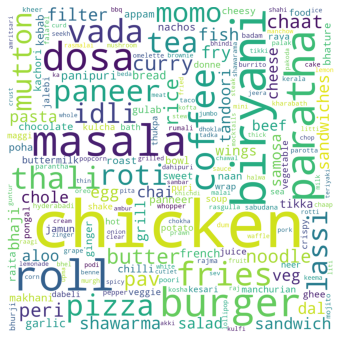

In [81]:
# gather the data of dish_liked feature and then creat a wordcloud
# created an empty list to store the entire data of popular dishes
stopwords=set(STOPWORDS)
dishes=''
for word in data['dish_liked'].dropna():
    words=word.split()
    # Converts each token into lowercase 
    for i in range(len(words)): 
        words[i] = words[i].lower() 
    dishes=dishes+ " ".join(words)+" "
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,stopwords = stopwords,width=1500, height=1500).generate(dishes)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud)
plt.axis("off")

In [82]:
## ANALYSING REVIEW OF RESTAURANT
#1 Analyze review of particular restaurant

In [83]:
# fetch the data of review_list column
# cleaning the data (removing special characters, extra spaces, repeated words)
# store the data in a word cloud
# display the wordcloud of reviews

In [84]:
# fetch the data of review_list column
df['reviews_list'][0]
data=df['reviews_list'][0].lower()
data

'[(\'rated 4.0\', \'rated\\n  a beautiful place to dine in.the interiors take you back to the mughal era. the lightings are just perfect.we went there on the occasion of christmas and so they had only limited items available. but the taste and service was not compromised at all.the only complaint is that the breads could have been better.would surely like to come here again.\'), (\'rated 4.0\', \'rated\\n  i was here for dinner with my family on a weekday. the restaurant was completely empty. ambience is good with some good old hindi music. seating arrangement are good too. we ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha. food was fresh and good, service is good too. good for family hangout.\\ncheers\'), (\'rated 2.0\', \'rated\\n  its a restaurant near to banashankari bda. me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet. on inquiring they said this plac

In [85]:
# cleaning the data (removing special characters) using substitute function of regular expression module
import re  
data2=re.sub('[^a-zA-Z]', ' ',data)  # except words...replace other things with white space
data2

# cleaning the data (removing repeated words)
data3=re.sub('repeat', ' ',data2)
data3

# cleaning the data (removing repeated characters)
data4=re.sub('x', ' ', data3)
data4

# cleaning the data (removing extra white spaces)
data5=re.sub(' +',' ',data4)
data5

' rated rated n a beautiful place to dine in the interiors take you back to the mughal era the lightings are just perfect we went there on the occasion of christmas and so they had only limited items available but the taste and service was not compromised at all the only complaint is that the breads could have been better would surely like to come here again rated rated n i was here for dinner with my family on a weekday the restaurant was completely empty ambience is good with some good old hindi music seating arrangement are good too we ordered masala papad panner and baby corn starters lemon and corrionder soup butter roti olive and chilli paratha food was fresh and good service is good too good for family hangout ncheers rated rated n its a restaurant near to banashankari bda me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet on inquiring they said this place is mostly visited by vegetarians anyways we ordered ala carte item

In [86]:
dataset=df[df['rest_type']=='Quick Bites']  # data w.r.t some Quick Bite restaurants

In [87]:
# store the data in a word cloud
total_review=' '  # empty list to store all the reviews for word cloud
for review in dataset['reviews_list']:  # accessing the review list column
    review=review.lower()
    review=re.sub('[^a-zA-Z]', ' ',review)
    review=re.sub('rated', ' ',review)
    review=re.sub('x',' ',review)
    review=re.sub(' +',' ',review)
    total_review=total_review + str(review)

(-0.5, 799.5, 799.5, -0.5)

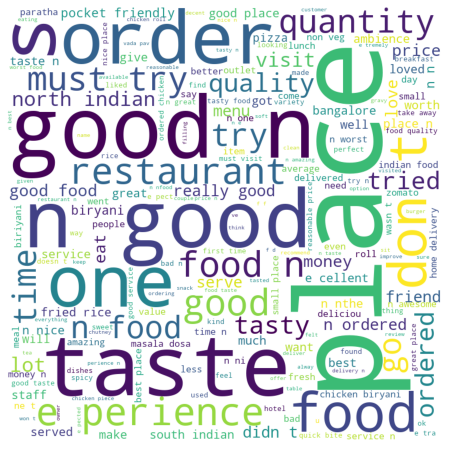

In [88]:
# display the wordcloud of reviews
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(total_review) 
# plot the WordCloud image                        
plt.figure(figsize = (12, 8)) 
plt.imshow(wordcloud) 
plt.axis("off") 

In [89]:
## PREPARING THE DATA FOR MODELLING PURPOSE
#1 preparing the data for ML modelling
#2 create target variable

In [90]:
# Imbalance data --outliers cause imbalance data
# outliers -- large deviations in the values of training data which causes less accurate models and poor results
# --if a data is trained w.r.t any ML algo and consist of outliers; 
# --then if new data is to be predicted on the basis of trained data, it will give poor and less accurate results.

In [91]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Top_types
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,Quick Bites + Casual Dining
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,Quick Bites + Casual Dining
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,others
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Quick Bites + Casual Dining
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,Quick Bites + Casual Dining


In [92]:
# splitting the data in two parts;
# 1st for the new restaurants-- rating--0
# 2nd for training purpose-- rating>0 for ML model

In [93]:
# created a function which distinguish between new restaurants and the restaurants that are already rated(for ML --training)
def assign(x):
    if x>0:
        return 1  # for training
    else:
        return 0  # for new restaurants
df['rated']=df['rate'].apply(assign)

In [94]:
# splitting the data frames
new_restaurants = df[df['rated'] == 0]
train_val_restaurants = df.query('rated == 1')

In [95]:
train_val_restaurants.head()  # this is the entire data frame required for the training

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Top_types,rated
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,others,1
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1


In [96]:
#2 Create a target variable --on the basis of which prediction is done...

In [97]:
train_val_restaurants['rate'].unique()  # on the basis of which target varible is created

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [98]:
# By now we've already splitted our original data into new_restaurants and train_val_restaurants using pandas DataFrames.
# The main point here is to define a fair threshold(rating) for splitting the restaurants into good and bad ones.
# Taking 3.75 as the threshold value... Good restaurants>=3.75 rating ; Bad restaurants<3.75 rating

In [99]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [100]:
# Defining a custom threshold for splitting restaurants into good and bad ; storing in new column 'target'
# Good restaurants-1
# Bad restaurants-0
threshold = 3.75
train_val_restaurants['target'] = train_val_restaurants['rate'].apply(lambda x: 1 if x >= threshold else 0)

In [101]:
train_val_restaurants.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Top_types,rated,target
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1,1
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1,1
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,others,1,1
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1,0
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,Quick Bites + Casual Dining,1,1


In [102]:
import plotly.graph_objs as go
from plotly.offline import iplot
x=train_val_restaurants['target'].value_counts()  # to check if there is imbalance data or not (outliers)
labels=['Good Restaurants(1)','Bad Restaurants(0)']
print(x)
trace=go.Pie(labels=labels,values=x,hoverinfo='label+percent',textinfo='percent',textfont=dict(size=25),
              pull=[0, 0, 0,0.2, 0])
iplot([trace])

0    21421
1    20244
Name: target, dtype: int64


In [103]:
# from the above pie chart, it is clear that approx both the values are equal; so there is no imbalance data... 

In [104]:
## PERFORM FEATURE IMPORTANCE/EXTRACTION ON DATA

In [105]:
# Define the features to be used on training. (important features)
# Here we will take a look at the raw data to select valuable features and apply some steps to create another ones.

In [106]:
# the main idea is to get the length of the list of cuisine and rest_type feature so that we can create a new column.
def count(x):
    return len(x.split(','))

In [107]:
# as it have some NAN values, that's why very firstly; have to convert into str  &  then apply count function
train_val_restaurants['total_cuisines']=train_val_restaurants['cuisines'].astype(str).apply(count)
train_val_restaurants['multiple_types']=train_val_restaurants['rest_type'].astype(str).apply(count)

In [108]:
# from these features, will choose the important features which will play important role in the prediction
train_val_restaurants.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'Top_types', 'rated', 'target',
       'total_cuisines', 'multiple_types'],
      dtype='object')

In [109]:
# important features...
imp_features=['online_order','book_table','location','rest_type',
              'multiple_types','total_cuisines','listed_in(type)', 
              'listed_in(city)','approx_cost(for two people)','target']

In [110]:
data = train_val_restaurants[imp_features]
data.head()

,online_order,book_table,location,rest_type,multiple_types,total_cuisines,listed_in(type),listed_in(city),approx_cost(for two people),target
0,Yes,Yes,Banashankari,Casual Dining,1,3,Buffet,Banashankari,800.0,1
1,Yes,No,Banashankari,Casual Dining,1,3,Buffet,Banashankari,800.0,1
2,Yes,No,Banashankari,"Cafe, Casual Dining",2,3,Buffet,Banashankari,800.0,1
3,No,No,Banashankari,Quick Bites,1,2,Buffet,Banashankari,300.0,0
4,No,No,Basavanagudi,Casual Dining,1,2,Buffet,Banashankari,600.0,1


In [111]:
## COMING ACCROSS WITH THE MISSING VALUES IN THE DATA...
#1 removing all the missing values
#2 separate catagorical and numerical values

In [112]:
#1 removing all the missing values
# checking how many missing values are there
data.isnull().sum()  

online_order                     0
book_table                       0
location                         0
rest_type                      149
multiple_types                   0
total_cuisines                   0
listed_in(type)                  0
listed_in(city)                  0
approx_cost(for two people)    247
target                           0
dtype: int64

In [113]:
data.dropna(how='any', inplace=True)  # --any is used to remove all missing values where ever present in the data

In [114]:
#2 separate catagorical and numerical values (-- separate objects from int and float)
data.dtypes

online_order                    object
book_table                      object
location                        object
rest_type                       object
multiple_types                   int64
total_cuisines                   int64
listed_in(type)                 object
listed_in(city)                 object
approx_cost(for two people)    float64
target                           int64
dtype: object

In [115]:
cat_features=[col for col in data.columns if data[col].dtype=='O']  # if dtype is object, store it in a cat_features list
num_features=[col for col in data.columns if data[col].dtype!='O']  # if dtype is int/float, store it in a num_features list

In [116]:
# for each cat_feature we found the total no. of unique values 
for feature in cat_features:
    print('{} has total {} unique features'.format(feature, data[feature].nunique()))

online_order has total 2 unique features
book_table has total 2 unique features
location has total 92 unique features
rest_type has total 87 unique features
listed_in(type) has total 7 unique features
listed_in(city) has total 30 unique features


In [117]:
## PERFORM FEATURE ENCODING ON THE DATA
#1 reducing the unique no. of features
#2 feature encoding --converting catagorical values into numerical values

In [118]:
#1 reducing the unique no. of features
# checking the % contibution of each location --if contribution is greater than threshold, keeping them(imp) and rest as others.
# location and rest_type has max features; so reducing thre less important ones

In [119]:
cols=['location','rest_type']
for col in cols:
    print('Total feature in {} are {}'.format(col,data[col].nunique()))

Total feature in location are 92
Total feature in rest_type are 87


In [120]:
# for location, setting threshold=0.4 for selecting important, and less important to others.
values=data['location'].value_counts()/len(data)*100
values

threshold=0.4
imp=values[values>threshold]
imp

BTM                      9.398851
Koramangala 5th Block    5.565651
HSR                      4.829057
Indiranagar              4.361416
JP Nagar                 4.143345
Jayanagar                3.959197
Whitefield               3.808970
Marathahalli             3.416443
Bannerghatta Road        2.970609
Koramangala 7th Block    2.556274
Koramangala 6th Block    2.553851
Brigade Road             2.549005
Bellandur                2.415740
Sarjapur Road            2.069250
Koramangala 1st Block    2.064404
Ulsoor                   2.057135
Koramangala 4th Block    2.037750
Electronic City          2.020789
MG Road                  1.921446
Banashankari             1.802719
Kalyan Nagar             1.681568
Malleshwaram             1.553149
Residency Road           1.463497
Richmond Road            1.463497
Basavanagudi             1.441690
Frazer Town              1.371423
Church Street            1.322963
Brookefield              1.315694
New BEL Road             1.226042
Kammanahalli  

In [121]:
# if value<threshold, assign it to others else keep the important ones
data['location']=np.where(data['location'].isin(imp.index),data['location'],'other')
data['location']

0        Banashankari
1        Banashankari
2        Banashankari
3        Banashankari
4        Basavanagudi
             ...     
51709      Whitefield
51711      Whitefield
51712      Whitefield
51715           other
51716           other
Name: location, Length: 41271, dtype: object

In [122]:
# for rest_type, setting threshold=1.5 for selecting important, and less important to others.
values2=data['rest_type'].value_counts()/len(data)*100
values2

threshold=1.5
imp2=values2[values2>threshold]
imp2

Quick Bites           33.643478
Casual Dining         23.299654
Cafe                   8.163117
Dessert Parlor         4.482566
Delivery               4.048848
Takeaway, Delivery     3.099028
Casual Dining, Bar     2.645926
Bakery                 1.705798
Beverage Shop          1.555572
Bar                    1.550726
Name: rest_type, dtype: float64

In [123]:
# if value<threshold, assign it to others else keep the important ones
data['rest_type']=np.where(data['rest_type'].isin(imp2.index),data['rest_type'],'other')
data['rest_type']

0             Casual Dining
1             Casual Dining
2                     other
3               Quick Bites
4             Casual Dining
                ...        
51709    Casual Dining, Bar
51711    Casual Dining, Bar
51712                   Bar
51715                   Bar
51716                 other
Name: rest_type, Length: 41271, dtype: object

In [124]:
# after applying feature reduction, we will observe less number of features
for feature in cat_features:
    print('{} has total {} unique features'.format(feature, data[feature].nunique()))

online_order has total 2 unique features
book_table has total 2 unique features
location has total 47 unique features
rest_type has total 11 unique features
listed_in(type) has total 7 unique features
listed_in(city) has total 30 unique features


In [125]:
#2 feature encoding --converting catagorical values into numerical values (ML works on numeric data)
# one-hot encoding 

In [126]:
cat_features

['online_order',
 'book_table',
 'location',
 'rest_type',
 'listed_in(type)',
 'listed_in(city)']

In [127]:
data_cat = data[cat_features]
for col in cat_features:
    col_encoded = pd.get_dummies(data_cat[col],prefix=col,drop_first=True)
    data_cat=pd.concat([data_cat,col_encoded],axis=1)
    data_cat.drop(col, axis=1, inplace=True)

In [128]:
data_cat.head()  # after applying feature encoding, all the data is converted into numerical values.

,online_order_Yes,book_table_Yes,location_Banashankari,location_Banaswadi,location_Bannerghatta Road,location_Basavanagudi,location_Bellandur,location_Brigade Road,location_Brookefield,location_Church Street,...,listed_in(city)_Lavelle Road,listed_in(city)_MG Road,listed_in(city)_Malleshwaram,listed_in(city)_Marathahalli,listed_in(city)_New BEL Road,listed_in(city)_Old Airport Road,listed_in(city)_Rajajinagar,listed_in(city)_Residency Road,listed_in(city)_Sarjapur Road,listed_in(city)_Whitefield
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [129]:
### PREPARE ENTIRE DATA FOR MODELLING
#1 concatenate both the datas numerical-catagorical data and numerical data
#2 Apply Random Forest on the data

In [130]:
data_final=pd.concat([data.loc[:,['multiple_types','total_cuisines','approx_cost(for two people)','target']],data_cat],axis=1)

In [131]:
data_final.head()

,multiple_types,total_cuisines,approx_cost(for two people),target,online_order_Yes,book_table_Yes,location_Banashankari,location_Banaswadi,location_Bannerghatta Road,location_Basavanagudi,...,listed_in(city)_Lavelle Road,listed_in(city)_MG Road,listed_in(city)_Malleshwaram,listed_in(city)_Marathahalli,listed_in(city)_New BEL Road,listed_in(city)_Old Airport Road,listed_in(city)_Rajajinagar,listed_in(city)_Residency Road,listed_in(city)_Sarjapur Road,listed_in(city)_Whitefield
0,1,3,800.0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,3,800.0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,3,800.0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,2,300.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,2,600.0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [132]:
X = data_final.drop('target', axis=1)  # independent data
y = data_final['target'].values  # dependent data (prediction)

In [133]:
data_final.shape

(41271, 97)

In [134]:
# 20% data is used for testing and 80% for training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)

In [135]:
X_train.shape  # 80% data for training

(33016, 96)

In [136]:
#2 Apply RANDOM FOREST (ensemble ML algo) on data
# Import the random forest model.
from sklearn.ensemble import RandomForestClassifier

# Initialize the model with some parameters.
model = RandomForestClassifier(n_estimators=100, min_samples_leaf=10, random_state=1)

# Fit the training data into the model.
model.fit(X_train, y_train)

# Make predictions.
predictions = model.predict(X_test)

In [137]:
# Confusion matrix.
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(predictions, y_test)

array([[3556, 1283],
       [ 696, 2720]])

In [138]:
#accuracy_score.
accuracy_score(predictions,y_test)

0.7602665051483949

In [139]:
#fit naive bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

In [140]:
### classifier models
models = []
models.append(('LogisticRegression', LogisticRegression()))
models.append(('Naive Bayes',GaussianNB()))
models.append(('RandomForest', RandomForestClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))

In [141]:
for name,model in models:
    print(name)
    print(models)

LogisticRegression
[('LogisticRegression', LogisticRegression()), ('Naive Bayes', GaussianNB()), ('RandomForest', RandomForestClassifier()), ('Decision Tree', DecisionTreeClassifier()), ('KNN', KNeighborsClassifier())]
Naive Bayes
[('LogisticRegression', LogisticRegression()), ('Naive Bayes', GaussianNB()), ('RandomForest', RandomForestClassifier()), ('Decision Tree', DecisionTreeClassifier()), ('KNN', KNeighborsClassifier())]
RandomForest
[('LogisticRegression', LogisticRegression()), ('Naive Bayes', GaussianNB()), ('RandomForest', RandomForestClassifier()), ('Decision Tree', DecisionTreeClassifier()), ('KNN', KNeighborsClassifier())]
Decision Tree
[('LogisticRegression', LogisticRegression()), ('Naive Bayes', GaussianNB()), ('RandomForest', RandomForestClassifier()), ('Decision Tree', DecisionTreeClassifier()), ('KNN', KNeighborsClassifier())]
KNN
[('LogisticRegression', LogisticRegression()), ('Naive Bayes', GaussianNB()), ('RandomForest', RandomForestClassifier()), ('Decision Tree'

In [142]:
# Make predictions on validation dataset

for name, model in models:
    print(name)
    model.fit(X_train, y_train)
    
    # Make predictions.
    predictions = model.predict(X_test)

    # Compute the error.
    from sklearn.metrics import confusion_matrix
    print(confusion_matrix(predictions, y_test))

    from sklearn.metrics import accuracy_score
    print(accuracy_score(predictions,y_test))
    print('\n')

LogisticRegression
[[3448 1507]
 [ 804 2496]]
0.7200484554815263


Naive Bayes
[[3040 1460]
 [1212 2543]]
0.6763173834039976


RandomForest
[[3511  948]
 [ 741 3055]]
0.7953967292549969


Decision Tree
[[3639  817]
 [ 613 3186]]
0.8267716535433071


KNN
[[3623 1006]
 [ 629 2997]]
0.8019382192610539


